In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Abstract work**

Abstract:
Brain tumors pose a significant health concern, necessitating accurate diagnostic tools for effective treatment planning. This project introduces a classification system that merges Convolutional Neural Network (CNN) and Long Short-Term Memory (LSTM) layers to analyze Magnetic Resonance Imaging (MRI) brain scans and detect signs of brain cancer, focusing on binary classification (Glioma Tumor vs. No Tumor).

Project Definition: Brain Cancer Binary Classification System Using Fusion of CNN and LSTM Layers

Background:
Brain cancer remains a critical health issue, demanding precise diagnostic solutions. This project aims to design a binary classification system utilizing CNN and LSTM layers to analyze MRI brain scans and accurately identify the presence or absence of Glioma Tumor.

Objective:
The primary goal is to develop a sophisticated binary classification system for MRI brain scans, enhancing accuracy in Glioma Tumor detection. This system aims to provide valuable support to healthcare professionals in making informed decisions about potential brain cancer.

Expected Steps:

1. Data Collection:
   - Utilize the Kaggle dataset "Brain Tumor Classification (MRI)" to acquire labeled MRI brain scans, focusing on Glioma Tumor and No Tumor categories.

2. Image Processing:
   - Preprocess images, including resizing and normalization, to prepare them for input into the CNN-LSTM model.

3. Model Architecture:
   - Construct a hybrid model featuring CNN layers for spatial feature extraction and LSTM layers for analyzing temporal patterns. Employ a pre-trained ResNet architecture for the CNN component.

4. Training and Validation:
   - Train the model on the labeled dataset, utilizing transfer learning for the ResNet component. Validate the model's performance on a separate dataset.

5. Hyperparameter Tuning:
   - Optimize hyperparameters to enhance the model's binary classification accuracy.

6. Evaluation Metrics:
   - Assess the model's performance using binary classification metrics such as accuracy, precision, recall, and F1 score.

7. Integration and Deployment:
   - Integrate the trained model into a user-friendly system suitable for binary brain cancer classification.

Technologies Used:
- Convolutional Neural Network (CNN) with ResNet architecture
- Long Short-Term Memory (LSTM)
- Transfer Learning
- TensorFlow and Keras (deep learning libraries)
- Python (for code implementation)

Expected Outputs:
- A robust binary classification model for Glioma Tumor detection.
- Evaluation metrics report showcasing the model's effectiveness.
- Integrated software for binary brain cancer classification from MRI scans.

Note: Ensure compliance with the dataset's terms of use and appropriate citation in project documentation.

# **Introduction to Dataset¶**

A Brain tumor is considered as one of the most aggressive diseases, among children and adults. The 5-year survival rate for people with a cancerous brain or CNS tumor is approximately 34 percent for men and 36 percent for women. And the best technique to detect brain tumors is Magnetic Resonance Imaging (MRI). The dataset is contributed by Navoneel Chakrabarty and Swati Kanchan.

This dataset provides a huge amount of image data generated through the scans. These images are typically examined by the radiologist. However, a manual examination can be error-prone due to the complexities. Hence, proposing a system performing detection and classification is the main goal of this dataset.

# **import libraries**

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display, clear_output
from warnings import filterwarnings

# **"Custom Color Palettes for Enhanced Visualizations"**

In [3]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

# **"Data Augmentation with Random Rotation and Flip in TensorFlow"**

In [4]:
rot = tf.keras.layers.RandomRotation(factor=0.2)
flip = tf.keras.layers.RandomFlip(mode="horizontal_and_vertical")

In [6]:
def augment(images):
    for i in range(len(images)):
        flipped = flip(images[i])
        images[i] = rot(flipped)
    
    return images

# **"Loading and Preprocessing Brain Tumor MRI Images for Classification"**

In [7]:
labels = ['glioma_tumor', 'no_tumor']

X_train = []
y_train = []
image_size = 224

for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri', 'Training', i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        img = preprocess_input(img)
        X_train.append(img)
        y_train.append(i)

for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri', 'Testing', i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        img = preprocess_input(img)
        X_train.append(img)
        y_train.append(i)


100%|██████████| 105/105 [00:00<00:00, 128.58it/s]


In [8]:
X_train = np.array(X_train)
y_train = np.array(y_train)

# **"Converting Multiclass Labels to Binary Representation"**

In [9]:
y_train = np.array([0 if label == 'glioma_tumor' else 1 for label in y_train])

# **"Augmenting Brain Tumor Image Data for Improved Model Performance"**

In [10]:
X_train = np.vstack((X_train, augment(X_train)))
y_train = np.hstack((y_train, y_train.copy()))

# **"Checking the Shape of Augmented Brain Tumor Image Data and Labels"**

In [11]:
X_train.shape, y_train.shape

((2852, 224, 224, 3), (2852,))

# **"Shuffling Augmented Brain Tumor Image Data and Labels"**

In [12]:
X_train, y_train = shuffle(X_train, y_train, random_state=101)

# **"Splitting Augmented Brain Tumor Data into Training and Testing Sets"**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=101)

# **"Checking the Shape of Training and Testing Data after Split"**

In [14]:
X_train.shape, X_test.shape

((2566, 224, 224, 3), (286, 224, 224, 3))

# **"Loading ResNet50 Model for Feature Extraction"¶**

In [15]:
r50 = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

94765736/94765736 [==============================] - 0s 0us/step


# **"Generating Predictions Using ResNet50 for Training and Testing Data"**

In [16]:
X_train_preds = r50.predict(X_train)
X_test_preds = r50.predict(X_test)

9/9 [==============================] - 19s 2s/step


# **"Reshaped ResNet50 Extracted Features for Training and Testing Datasets"**

In [17]:
X_train_features = X_train_preds.reshape((X_train_preds.shape[0], -1))
X_test_features = X_test_preds.reshape((X_test_preds.shape[0], -1))

# **"Cascaded CNN-LSTM Model for Brain Tumor Classification"**

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Reshape((1, -1), input_shape=(X_train_features.shape[1],)),
    tf.keras.layers.LSTM(512, activation='relu', return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(256, activation='relu', return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(128, activation='relu', return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification, use sigmoid
])

# **"Summary of Cascaded CNN-LSTM Model for Brain Tumor Classification"**

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 1, 100352)         0         
                                                                 
 lstm (LSTM)                 (None, 1, 512)            206571520 
                                                                 
 dropout (Dropout)           (None, 1, 512)            0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 256)            787456    
                                                                 
 dropout_1 (Dropout)         (None, 1, 256)            0         
                                                                 
 lstm_2 (LSTM)               (None, 1, 128)            197120    
                                                                 
 dropout_2 (Dropout)         (None, 1, 128)            0

# **"Compiling Cascaded CNN-LSTM Model for Brain Tumor Classification"**

In [20]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

# **"Configuring Callbacks for CNN-LSTM Model Training"**

In [21]:
tensorboard = TensorBoard(log_dir='logs')
checkpoint = ModelCheckpoint("bestomodelo.h5", monitor="val_accuracy", save_best_only=True, mode="auto", verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.3, patience=2, min_delta=0.001, mode='auto', verbose=1)

# **"Training CNN-LSTM Model with ResNet Features"**

In [22]:
history = model.fit(X_train_features, y_train, validation_split=0.1, epochs=50, verbose=1, batch_size=32,
                    callbacks=[tensorboard, checkpoint, reduce_lr])

Epoch 1/50
73/73 [==============================] - ETA: 0s - loss: 0.5580 - accuracy: 0.7375
Epoch 1: val_accuracy improved from -inf to 0.89883, saving model to bestomodelo.h5


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


73/73 [==============================] - 107s 1s/step - loss: 0.5580 - accuracy: 0.7375 - val_loss: 0.2629 - val_accuracy: 0.8988 - lr: 0.0010
Epoch 2/50
73/73 [==============================] - ETA: 0s - loss: 0.3959 - accuracy: 0.8489
Epoch 2: val_accuracy improved from 0.89883 to 0.91051, saving model to bestomodelo.h5
73/73 [==============================] - 147s 2s/step - loss: 0.3959 - accuracy: 0.8489 - val_loss: 0.2142 - val_accuracy: 0.9105 - lr: 0.0010
Epoch 3/50
73/73 [==============================] - ETA: 0s - loss: 0.3345 - accuracy: 0.8792
Epoch 3: val_accuracy did not improve from 0.91051
73/73 [==============================] - 107s 1s/step - loss: 0.3345 - accuracy: 0.8792 - val_loss: 0.3003 - val_accuracy: 0.8872 - lr: 0.0010
Epoch 4/50
73/73 [==============================] - ETA: 0s - loss: 0.2799 - accuracy: 0.9030
Epoch 4: val_accuracy improved from 0.91051 to 0.96109, saving model to bestomodelo.h5
73/73 [==============================] - 111s 2s/step - loss: 0.

# **"Training and Validation Accuracy/Loss Over Epochs"**

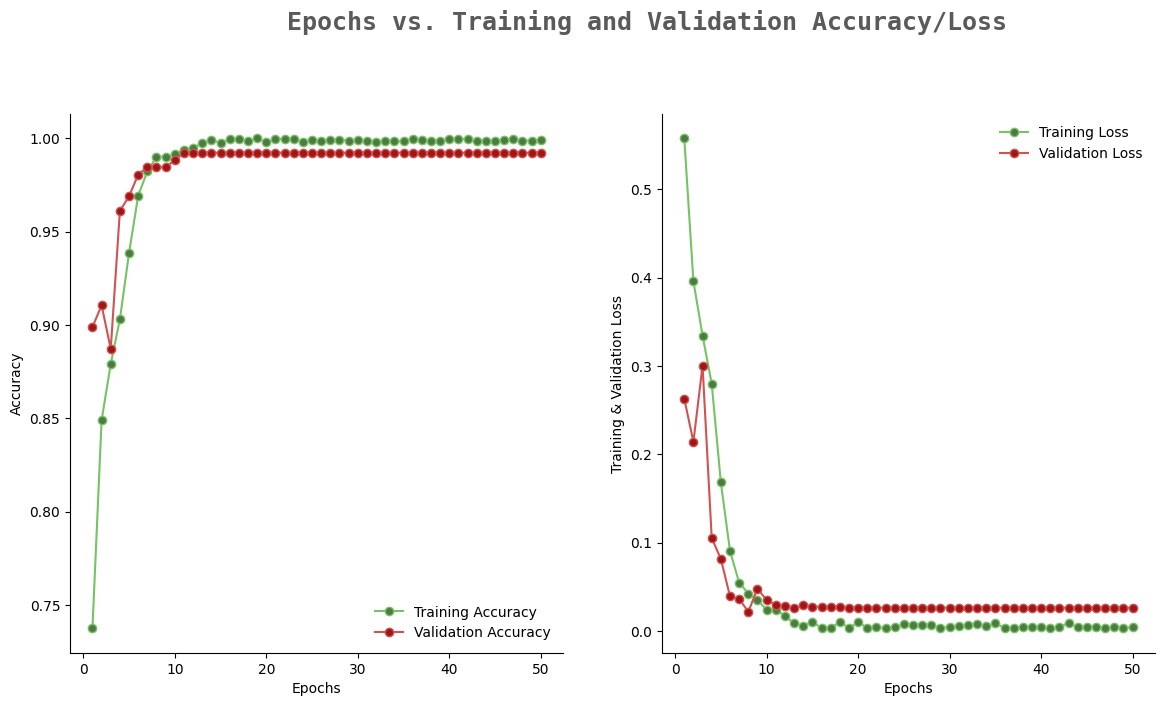

In [25]:

filterwarnings('ignore')

epochs = range(1, 51)  # Assuming the training was done for 50 epochs
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss', size=18, fontweight='bold',
         fontname='monospace', color=colors_dark[1], y=1, x=0.28, alpha=0.8)

sns.despine()

ax[0].plot(epochs, train_acc, marker='o', markerfacecolor=colors_green[2], color=colors_green[3],
           label='Training Accuracy')
ax[0].plot(epochs, val_acc, marker='o', markerfacecolor=colors_red[2], color=colors_red[3],
           label='Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()

ax[1].plot(epochs, train_loss, marker='o', markerfacecolor=colors_green[2], color=colors_green[3],
           label='Training Loss')
ax[1].plot(epochs, val_loss, marker='o', markerfacecolor=colors_red[2], color=colors_red[3],
           label='Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

fig.show()

# **"Model Evaluation on Test Set: Accuracy and Loss"**

In [26]:
test_loss, test_accuracy = model.evaluate(X_test_features, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}')

fig.suptitle(f'Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}', size=16, y=1.05)

fig.show()

Test Accuracy: 0.9930, Test Loss: 0.0282


# **Evaluate the model on the test set**

Test Accuracy: 0.9930, Test Loss: 0.0282


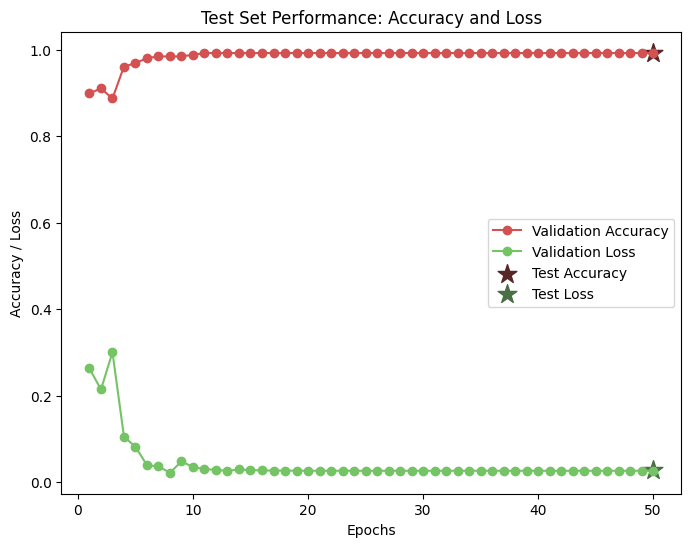

In [28]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_features, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}')

# Plotting test accuracy and loss
fig, ax = plt.subplots(figsize=(8, 6))

# Plotting test accuracy
ax.plot(epochs, val_acc, marker='o', label='Validation Accuracy', color=colors_red[3])

# Plotting test loss
ax.plot(epochs, val_loss, marker='o', label='Validation Loss', color=colors_green[3])

# Highlight the test accuracy and loss
ax.scatter(len(epochs), test_accuracy, color=colors_red[1], marker='*', s=200, label='Test Accuracy')
ax.scatter(len(epochs), test_loss, color=colors_green[1], marker='*', s=200, label='Test Loss')

# Set labels and title
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy / Loss')
ax.set_title('Test Set Performance: Accuracy and Loss')

# Show legend
ax.legend()

plt.show()


# **"Heatmap of Confusion Matrix for Binary Brain Tumor Classification"**

9/9 [==============================] - 1s 145ms/step


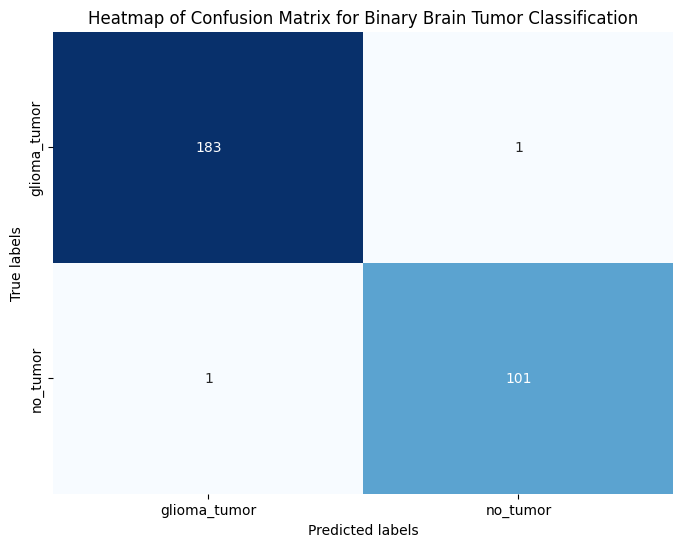

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
import numpy as np
import tensorflow as tf

# Assuming pred is the predictions made by your model on the test set
# It should be a binary array (0 or 1)
pred = model.predict(X_test_features)
pred = np.round(pred).flatten()

# Convert one-hot encoded labels back to original labels
y_true = y_test

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, pred)

# Plot heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix, ax=ax, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Heatmap of Confusion Matrix for Binary Brain Tumor Classification')

# Display the heatmap
plt.show()
